In [2]:
import sklearn.datasets as ds
import numpy as np
import pandas as pd

In [3]:
digital = ds.load_boston()

In [4]:
train = digital.data
target = digital.target

In [5]:
print (train.shape)
print (target.shape)

(506, 13)
(506,)


In [5]:
target


array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [141]:
train[:5, :]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00]])

## 仿真数据

In [57]:
v1 = np.ones((1000, 1))
v1[200:700, :] = -1
v1[700:, :] = 0

v2 = np.ones((1500, 1))
v2[:800, :] = 0
v2[800:1300:, :] = 1
v2[1300:, :] = -1

miu1 = np.random.normal(loc=0, scale=0.3, size=(1000, 100))
miu2 = np.random.normal(loc=0, scale=0.3, size=(1500, 100))

u1 = np.random.normal(loc=0, scale=1, size=(100, 1))
u2 = np.random.normal(loc=0, scale=1, size=(100, 1))

In [58]:
X_train = v1.dot(u1.T) + miu1
y_train = v2.dot(u2.T) + miu2

In [63]:
train = X_train.T
target = y_train.T

In [89]:
print (train.shape)
print (target.shape)

(100, 1000)
(100, 1500)


## 划分数据集

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.33, random_state=42)

## 标准化

In [186]:
# scalar = StandardScaler()
# X_train = scalar.fit_transform(X_train)
# X_test = scalar.fit_transform(X_test)

## 简单测试决策树的正确率

In [78]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, r2_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [205]:
# clf = DecisionTreeClassifier(random_state=2018, max_depth=7)
# clf = AdaBoostClassifier(random_state=2018, n_estimators=100)
# clf = GradientBoostingClassifier(random_state=2018)
clf = DecisionTreeRegressor(random_state=2018)
clf.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=2018, splitter='best')

In [206]:
print(r2_score( y_test, clf.predict(X_test)))

0.7310977687308629


## gcca

In [10]:
from numpy.linalg import svd


In [93]:
X_train_t = X_train.transpose(1, 0)
y_train_t = y_train.transpose(1, 0)
X_test_t = X_test.transpose(1, 0)
y_test_t = y_test.transpose(1, 0)

In [94]:
print (X_train_t.shape)
print (y_train_t.shape)

(1000, 67)
(1500, 67)


In [95]:
# svd
p1, s1, q1 = np.linalg.svd(X_train_t, full_matrices=False)
p2, s2, q2 = np.linalg.svd(y_train_t, full_matrices=False)

In [96]:
print (p1.shape)
print (s1.shape)
print (q1.shape)

print("below is q2: ")
print (p2.shape)
print (s2.shape)
print (q2.shape)

(1000, 67)
(67,)
(67, 67)
below is q2: 
(1500, 67)
(67,)
(67, 67)


In [138]:
# calculate G
G = q1.T.dot(q1) + q2.T.dot(q2)

# take the first twenty dimention
# G20 = G[0, :]

In [142]:
p, _, G_eig = np.linalg.svd(G)

In [143]:
G_eig.shape

(67, 67)

In [144]:
G10 = G_eig[:10, :]

In [147]:
G10

array([[ 0.00000000e+000,  9.25270787e-002, -1.17855326e-001,
        -3.25946831e-001,  1.16337854e-001,  6.26524311e-002,
         5.70438231e-002,  6.16258034e-002, -1.67315177e-001,
         1.00107804e-002,  2.01569184e-002, -5.03704397e-002,
         7.84419775e-002,  9.37065890e-003, -2.92465231e-001,
        -1.46638415e-001,  1.70985671e-001, -1.14867196e-002,
         2.63798361e-001, -6.52186195e-002, -9.76252631e-003,
        -3.36696795e-001, -1.36976569e-001, -5.68985426e-004,
        -1.26950372e-001, -1.16398946e-001, -9.68332301e-004,
        -5.59678937e-003, -1.43241495e-001, -1.02115202e-001,
         2.63339268e-003,  1.76492086e-001,  4.37622575e-002,
         1.98176700e-001, -1.31897801e-001, -1.06671449e-002,
        -1.32222518e-001, -1.67697184e-001,  3.85739297e-002,
         1.69654171e-002,  1.27885287e-001, -8.85806725e-002,
        -6.76224475e-002, -1.19449814e-002, -8.84531002e-002,
         5.82668516e-002,  6.47509561e-002, -3.75138008e-002,
        

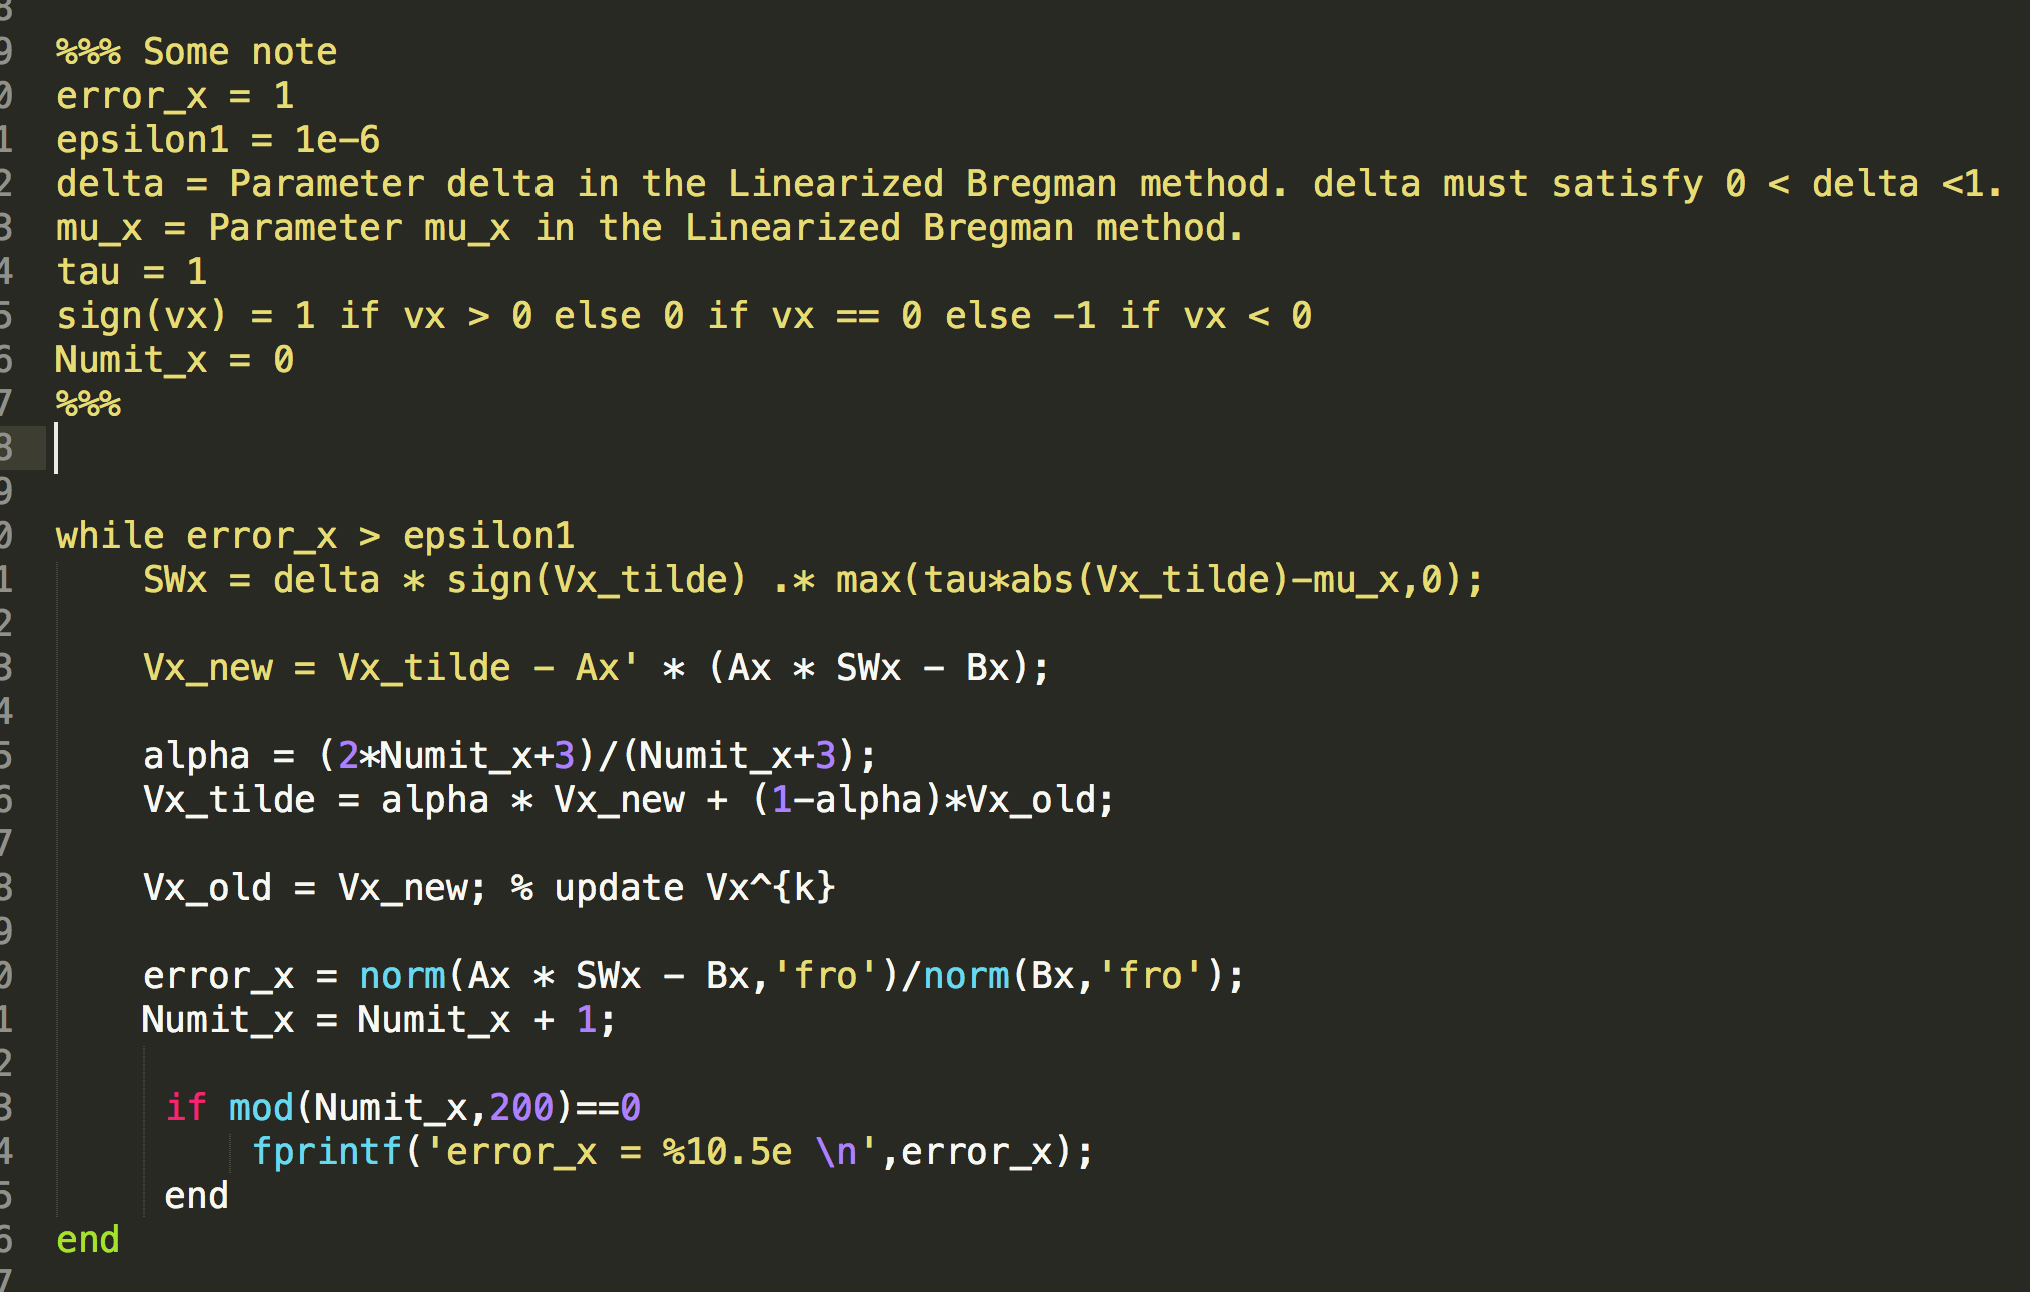

In [154]:
# 一些参数的设置
error_x = 1
epsilon = 1e-5
delta = 0.9
tau = 1
mu_x = 5
Numit_x = 0

In [155]:
N = s1.shape[0]
s1_square = np.zeros((N, N))
s1_square[np.arange(N), np.arange(N)] = s1
Ax1 = p1.T # s1_square.dot(p1.T) 
Bx1 = np.linalg.inv(s1_square).dot(q1.dot(G10.T)).dot(np.identity(10))
print (Ax1.shape) # (s, d)
print (Bx1.shape) # (s, r)
Vx_tilde = Ax1.T.dot(Bx1)
Vx_old = Vx_tilde
print(Vx_tilde.shape)

(67, 1000)
(67, 10)
(1000, 10)


In [156]:
# # bring all into one function
# def generateU(p, s, q, G):
#     N = s.shape[0]
#     s1_square = np.zeros((N, N))
#     s1_square[np.arange(N), np.arange(N)] = s
#     Ax = s1_square.dot(p.T) 
#     Bx = q.dot(G.T)
#     print ("Ax shape: ",Ax.shape) # (s, d)
#     print ("Bx shape: ",  Bx.shape) # (s, r)
# #     Vx_tilde = Ax.T.dot(Bx)
# #     Vx_old = Vx_tilde
#     U = np.linalg.inv(Ax).dot(Bx)
#     print ("U shape: ",U.shape)
#     return U

In [157]:
# U1 = generateU(p1, s1, q1, G10)
# U2 = generateU(p2, s2, q2, G10)

In [158]:
# y1 = U1.T.dot(X_train_t)
# y2 = U2.T.dot(y_train_t)
# print (y1.shape)
# print (y2.shape)

In [159]:
# r2_score(y1, y2)

In [162]:
Swx

array([[-0.      , -0.      , -0.      , ..., -0.033156,  0.      ,
        -0.      ],
       [-0.      ,  0.      , -0.      , ..., -0.      ,  0.      ,
        -0.      ],
       [-0.      , -0.      , -0.      , ...,  0.      , -0.      ,
        -0.      ],
       ...,
       [ 0.      , -0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      , -0.      ,
         0.      ],
       [-0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ]])

## linearized bregman

In [160]:
while error_x > epsilon:
    Swx = delta * np.sign(Vx_tilde) * np.maximum(tau * np.abs(Vx_tilde) - mu_x, 0)
    # print(Swx.shape)
    Vx_new = Vx_tilde - Ax1.T.dot(Ax1.dot(Swx) - Bx1)
    alpha = (2 * Numit_x + 3) / (Numit_x + 3)
    Vx_tilde = alpha * Vx_new + (1 - alpha)* Vx_old
    
    Vx_old = Vx_new
    
    error_x = np.linalg.norm(Ax1.dot(Swx) - Bx1, "fro") / np.linalg.norm(Bx1, "fro")
    Numit_x = Numit_x + 1
    
    print (error_x)
    if Numit_x % 200 == 0:
        print(error_x)

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9900855384323778
0.9891713805635809
0.9920080126579808
1.0118241260708223
1.0323924518356153
1.0443291771535124
1.0561582169624408
1.1037977689809775
1.1816249515398223
1.261594346415678
1.3513477824972102
1.4268528153093452
1.5373529152326004
1.6684988203923987
1.7963972111229392
1.8673889994645967
1.8763337758143606
1.8187074033972297
1.686858308161902
1.5527683596863746
1.4662927671597759
1.4110427265252479
1.3691994115656025
1.3360086249708194
1.3114918895416783
1.3190933025396188
1.3303812834033772
1.3139492654499396
1.261910183579093
1.2127145990330104
1.1854255301266936
1.1679430664487855
1.1462122104996937
1.1192034524872954
1.082644911340857
1.035686330670905
0.9901296595782653
0.9510761975353427
0.932594437143773
0.9409094240100803
0.9594940750465423
0.9707801932535562
0.961709

0.004890787583709729
0.004957976591573877
0.0049953275841026655
0.005005081129114076
0.004983935107053625
0.00494593912251269
0.00489476458178706
0.004837664220250108
0.00477792432819019
0.004716270007429198
0.004658914977483309
0.004614539721529612
0.0045662890129823394
0.004505495261587833
0.004431338672914462
0.004348302752809429
0.004263646411049183
0.00418485983860487
0.00411753011612344
0.004064612593330108
0.004026727357706375
0.004023039548206364
0.004073444173494326
0.004139979311688662
0.004202707574114052
0.004312255874620483
0.004419050036925256
0.004488801979750252
0.004516606416491317
0.004510940197228666
0.004486289237374185
0.004450257830377195
0.004405011753492483
0.004350298336150132
0.004287956348542998
0.004220427175566262
0.004152086784105133
0.00408735241995543
0.004023543890517829
0.003955772949526353
0.003901579768906964
0.003854186935521972
0.003812313746390914
0.0037879368741505124
0.0038123999278643936
0.003835927606822578
0.0038506163570792775
0.003859365132

0.0010106153341604793
0.0010022922620674492
0.0009949168086270347
0.0009882382860218414
0.0009819683882268493
0.0009758230956572923
0.0009695561675720802
0.0009629817353562843
0.0009559857830571793
0.0009485278292535507
0.0009406349605269373
0.0009323901390095096
0.0009239227915088095
0.0009153839675322557
0.0009069357696562927
0.0008987380530682438
0.0008909344955032912
0.000883640000964061
0.000876930245285389
0.0008708344329483705
0.0008651636442257827
0.0008601866931762856
0.0008557138078291761
0.0008515463311823942
0.0008475302297454866
0.0008435530994564459
0.0008395443836398466
0.0008354825851917708
0.0008314025343308843
0.0008278334626671341
0.0008270248417481624
0.0008272847801185907
0.0008274334392819438
0.0008270711655503232
0.0008263652287615179
0.0008257338185839947
0.0008256238255765237
0.0008263797493469236
0.0008281687775713993
0.0008309624927314959
0.0008345784451575649
0.0008387549904404568
0.0008432178496649145
0.0008477145119768756
0.0008520207333897496
0.0008559368

0.00037591142479945824
0.00037507181429383574
0.0003744873968234263
0.00037393038809306996
0.00037324471839968214
0.0003723734441693116
0.00037133197420245924
0.00037016997985784574
0.00036894490538798015
0.00036770882026721376
0.00036650265641639617
0.00036535410201008975
0.00036427885168004864
0.00036328515532412805
0.00036237973577494387
0.0003615720286831683
0.00036087469417135805
0.0003603006351734117
0.00035985862105718903
0.00035954997961211676
0.00035936782457159
0.0003592988486021408
0.0003592993643015893
0.0003593928063912638
0.000359556601691088
0.0003597810298820312
0.0003600692791951967
0.0003604313644670085
0.000360880028524974
0.0003614283605240725
0.0003620878262028909
0.0003633129916452869
0.00036728647472043276
0.0003720026311451493
0.00037583550801796334
0.00037828756686160897
0.00037957443058735064
0.0003801278964910912
0.0003822407541940453
0.00039452394059795703
0.0004095803681316893
0.00042133710045003895
0.0004276661899300752
0.0004294736840548949
0.000428732073

0.00022262940077654825
0.00022342686568970445
0.00022410361272989882
0.0002246553798044172
0.0002250783874420621
0.00022536934952293466
0.0002255255243121031
0.00022554477609981554
0.00022542562396535382
0.0002251672704483166
0.000224769621749578
0.00022423332065226026
0.00022355980963094792
0.00022275142986242908
0.00022181154965444775
0.00022074470725167133
0.00021955674811255415
0.00021825493434889695
0.00021681101713850128
0.00021525768814852403
0.00021362683718573522
0.00021192537206776276
0.00021016343697024764
0.0002083545242240593
0.00020651390145336233
0.00020465697184008836
0.00020279813860541812
0.00020279813860541812
0.0002009502556342425
0.0001991246027148165
0.0001973311440827036
0.00019557869709196173
0.00019387476791660337
0.00019222513348659108
0.00019063347907119453
0.0001891013647346504
0.0001876285727794683
0.00018621368721053253
0.00018485470246167536
0.00018354953151752097
0.00018229638539857403
0.0001810940519885935
0.00017994210167876498
0.00017884102196768034
0

0.00015664256573924578
0.00015559497120028
0.00015439855598052871
0.00015305288829214184
0.0001515605777977772
0.00014992773339116367
0.00014816420839834662
0.00014628361563018345
0.00014430311826134937
0.00014224302279657603
0.00014012621594009569
0.00013797749698689964
0.00013582286081958962
0.00013368878353136088
0.0001316015535242004
0.00012958667681215068
0.00012766836820253262
0.00012586912281037442
0.0001242093481489771
0.00012270702884519148
0.00012137739597792005
0.00012023258174634115
0.00011928125629316669
0.00011861289259832042
0.00011844891420785556
0.00011854979117455615
0.00011872824273075174
0.00011891214816115683
0.0001191026726762266
0.00011933207755591898
0.00011963678325739866
0.00012003956518615964
0.00012053922172475625
0.00012111115970024676
0.00012171788259422653
0.00012232208128955282
0.00012289503635598716
0.000123418236018479
0.00012388074450968485
0.00012427585605227754
0.0001245990278503204
0.00012484734205112197
0.00012501993634101655
0.0001251187587920235

8.674050635967858e-05
8.650875040832508e-05
8.626451711111711e-05
8.601020784588819e-05
8.5748156612425e-05
8.548057506124804e-05
8.520950416199396e-05
8.493677399190163e-05
8.466397268934225e-05
8.439242515126998e-05
8.41231815669013e-05
8.385701542216315e-05
8.359443018276814e-05
8.333567351805734e-05
8.308075766248303e-05
8.28294843530132e-05
8.258147272379164e-05
8.233618859133847e-05
8.209297370375769e-05
8.185107374910353e-05
8.160966419186727e-05
8.136787331395972e-05
8.112480214862181e-05
8.087954129446477e-05
8.063118485539914e-05
8.037884196086e-05
8.012164646530243e-05
7.9858765501225e-05
7.958940756995984e-05
7.931283079912993e-05
7.902835188812555e-05
7.87353561155306e-05
7.843330860434958e-05
7.81217668556463e-05
7.780039437249803e-05
7.746897502499873e-05
7.712742766077612e-05
7.67758203500963e-05
7.64143835825193e-05
7.604352169795311e-05
7.566382184563973e-05
7.527605981849655e-05
7.48812021989581e-05
7.448040437845644e-05
7.407500416784559e-05
7.366651088955765e-05
7.

4.71771222595314e-05
4.7606230269262586e-05
4.803935120367185e-05
4.846997950891308e-05
4.88917803023641e-05
4.929894198328285e-05
4.9686683898955206e-05
5.0051764229235e-05
5.0392808617186855e-05
5.071033472098281e-05
5.1006449966528514e-05
5.128430284716842e-05
5.154743337931766e-05
5.1799178634740534e-05
5.2042251035043014e-05
5.2278542557390274e-05
5.250914321443673e-05
5.273451650789799e-05
5.295475563060509e-05
5.316984878743731e-05
5.337990087885095e-05
5.3585282063506554e-05
5.3786694402008947e-05
5.398516275851942e-05
5.418196522960874e-05
5.4378522865175236e-05
5.4576269791357936e-05
5.477652410306012e-05
5.498037758581004e-05
5.518861867647748e-05
5.540169815063878e-05
5.561974102044804e-05
5.584260141126493e-05
5.606995048919499e-05
5.6301381815071505e-05
5.653651495189305e-05
5.6775077716784625e-05
5.701695063836672e-05
5.726216370535622e-05
5.7510844308699144e-05
5.776312470279434e-05
5.801902538663391e-05
5.827833578249074e-05
5.854051436633765e-05
5.880462683560844e-05


4.029645934376467e-05
4.0325043547560886e-05
4.035169802347482e-05
4.037623992567377e-05
4.039850571149347e-05
4.0418352158065036e-05
4.0435656984466045e-05
4.0450319094123995e-05
4.046225846570276e-05
4.047141573180946e-05
4.047775149521085e-05
4.048124543653176e-05
4.048189527113627e-05
4.0479715610806916e-05
4.0474736784468104e-05
4.046700366489966e-05
4.045657454123169e-05
4.0443520067952223e-05
4.042792231109373e-05
4.0409873902633166e-05
4.038947730483138e-05
4.036684417769277e-05
4.0342094834953585e-05
4.031535777093529e-05
4.028676923387643e-05
4.025647282394905e-05
4.022461909066413e-05
4.01913651097335e-05
4.015687402114872e-05
4.012131451517071e-05
4.008486025930849e-05
4.004768926201862e-05
4.000998317671866e-05
3.997192655334079e-05
3.9933706046770296e-05
3.9895509596128814e-05
3.985752558828919e-05
3.981994202027247e-05
3.978294567230104e-05
3.974672130168328e-05
3.971145086507185e-05
3.9677312771653195e-05
3.964448116693374e-05
3.9613125243139205e-05
3.958340856904958e-0

3.128447897475689e-05
3.114797459788533e-05
3.101184422480571e-05
3.087632297956412e-05
3.0741651768901805e-05
3.0608076631217934e-05
3.0475847983847937e-05
3.034521977107384e-05
3.021644851568963e-05
3.008979227941644e-05
2.9965509539007377e-05
2.984385798504234e-05
2.9725093253502025e-05
2.9609467600844046e-05
2.9497228534460344e-05
2.9388617412534703e-05
2.9283868027253344e-05
2.9183205187194524e-05
2.9086843315485568e-05
2.8994985079527468e-05
2.890782007008777e-05
2.8825523546056683e-05
2.874825526213109e-05
2.867615839366924e-05
2.86093585756259e-05
2.854796306688348e-05
2.849206005309902e-05
2.844171809759418e-05
2.8396985747712542e-05
2.8357891302605316e-05
2.8324442745221035e-05
2.8296627839142385e-05
2.8274414387557248e-05
2.8257750650905367e-05
2.824656591546355e-05
2.8240771203937622e-05
2.824026011723613e-05
2.8244909794149667e-05
2.8254581974783653e-05
2.826912415250216e-05
2.8288370797977657e-05
2.8312144638355576e-05
2.8340257975634378e-05
2.8372514026539546e-05
2.84087

2.5757685281459485e-05
2.5711742406440802e-05
2.5664624350468146e-05
2.5616378961975627e-05
2.5567051337647452e-05
2.5516683628147507e-05
2.546531486720797e-05
2.5412980823522647e-05
2.5359713878273233e-05
2.530554292808296e-05
2.5250493314598732e-05
2.519458678105929e-05
2.5137841456529987e-05
2.5080271867817525e-05
2.5021888978794888e-05
2.4962700257074422e-05
2.4902709768083943e-05
2.484191829495228e-05
2.478032348401678e-05
2.471792001505855e-05
2.465469979459037e-05
2.4590652171367905e-05
2.4525764172161818e-05
2.4460020756592337e-05
2.439340508966625e-05
2.4325898828866318e-05
2.425748242566678e-05
2.4188135438014905e-05
2.4117836853077882e-05
2.4046565417380105e-05
2.397429997238231e-05
2.3901019794321364e-05
2.3826704935423743e-05
2.375133656508519e-05
2.367489730891795e-05
2.3597371583894616e-05
2.3518745928335722e-05
2.3439009324339488e-05
2.3358153511496913e-05
2.3276173290735987e-05
2.319306681640117e-05
2.310883587563007e-05
2.3023486153891886e-05
2.2937027485442064e-05
2.

2.112757547058651e-05
2.1123768092794575e-05
2.1119358270150494e-05
2.1114312441649025e-05
2.110859613447126e-05
2.1102174081983243e-05
2.109501034570763e-05
2.1087068439603915e-05
2.107831145670736e-05
2.1068702197302474e-05
2.105820329822528e-05
2.104677736258351e-05
2.1034387089527873e-05
2.102099540380221e-05
2.100656558426013e-05
2.099106139129772e-05
2.0974447192613617e-05
2.0956688087118202e-05
2.093775002661043e-05
2.0917599935105107e-05
2.08962058252524e-05
2.087353691212416e-05
2.0849563724033866e-05
2.0824258209853868e-05
2.0797593843401734e-05
2.0769545724639178e-05
2.0740090676940157e-05
2.070920734162797e-05
2.0676876268530996e-05
2.0643080003570265e-05
2.0607803172583384e-05
2.057103256206703e-05
2.0532757196351277e-05
2.0492968411671376e-05
2.0451659926450076e-05
2.0408827909159945e-05
2.036447104196867e-05
2.031859058185987e-05
2.027119041804616e-05
2.0222277126391053e-05
2.017186002038317e-05
2.0119951198864095e-05
2.0066565590228424e-05
2.001172099287019e-05
1.995543

1.4325280503843895e-05
1.4225951398177058e-05
1.4126604954345475e-05
1.4027362680344329e-05
1.3928349114700061e-05
1.382969172689346e-05
1.3731520800533424e-05
1.3633969297735605e-05
1.3537172704303987e-05
1.3441268853309836e-05
1.334639772588347e-05
1.3252701228241463e-05
1.3160322943071293e-05
1.3069407854820175e-05
1.2980102047177387e-05
1.2892552372976873e-05
1.280690609451257e-05
1.2723310495259024e-05
1.2641912462780926e-05
1.256285804304194e-05
1.2486291966919048e-05
1.2412357150972327e-05
1.2341194173651658e-05
1.2272940729984175e-05
1.2207731066871257e-05
1.2145695403996272e-05
1.2086959343294404e-05
1.2031643272120118e-05
1.1979861765733573e-05
1.1931722994420959e-05
1.1887328141387679e-05
1.1846770837987685e-05
1.1810136623247646e-05
1.1777502433317533e-05
1.1748936128900353e-05
1.1724496065614742e-05
1.1704230714065586e-05
1.168817833502587e-05
1.1676366714425654e-05
1.1668812961732125e-05
1.1665523375800284e-05
1.1666493379165454e-05
1.167170752253245e-05
1.168113955914999

1.3914474167172078e-05
1.3917794703784585e-05
1.3920078844426804e-05
1.3921316450935053e-05
1.3921498417077043e-05
1.3920616680428513e-05
1.3918664234529216e-05
1.3915635141776537e-05
1.3911524546190969e-05
1.3906328687604358e-05
1.3900044915010548e-05
1.3892671700982101e-05
1.388420865614119e-05
1.3874656543755713e-05
1.3864017294254815e-05
1.3852294020389867e-05
1.3839491031396307e-05
1.3825613848129273e-05
1.3810669216992983e-05
1.3794665124381924e-05
1.3777610810107085e-05
1.3759516780569712e-05
1.3740394821450889e-05
1.3720258009441995e-05
1.3699120723421645e-05
1.367699865416011e-05
1.3653908813636026e-05
1.3629869542602206e-05
1.3604900517007016e-05
1.3579022753014316e-05
1.3579022753014316e-05
1.3552258610289769e-05
1.3524631793526558e-05
1.3496167352011173e-05
1.3466891677490778e-05
1.3436832499315577e-05
1.3406018877448273e-05
1.3374481193328677e-05
1.334225113711763e-05
1.3309361692972054e-05
1.3275847121157302e-05
1.3241742936710574e-05
1.3207085884705703e-05
1.317191391256

## test cca_sklearn

In [67]:
print (X_train.shape)
print (y_train.shape)

(67, 1000)
(67, 1500)


In [32]:
from sklearn.cross_decomposition import CCA
from sklearn.metrics import r2_score

In [27]:
cca = CCA(n_components=5)
cca.fit(X_train, y_train)

X_c, Y_c = cca.transform(X_train, y_train)

/Users/huojunyi/anaconda3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:287: UserWarning: Y residual constant at iteration 1
  warnings.warn('Y residual constant at iteration %s' % k)


In [28]:
print (X_c.shape)
print (Y_c.shape)

(339, 5)
(339,)


In [29]:
X_c

array([[ 0.56550811,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 1.10326381,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.57978604,  0.        ,  0.        ,  0.        ,  0.        ],
       ...,
       [-0.60220739,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 1.46981221,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.55734004,  0.        ,  0.        ,  0.        ,  0.        ]])

In [30]:
cca.score(X_train, y_train)

0.6625787935493138

In [34]:
r2_score(y_train, cca.predict(X_train))

0.6625787935493138

In [35]:
cca.x_weights_

array([[ 0.1383004 ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.12212917,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.05742609,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.12141281,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.26843179,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.39456512,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.05025938,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.42917394,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.28582914,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.19182343,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.29364141,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.14843852,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.55381523,  0.        ,  0.        ,  0.        ,  0.        ]])

In [36]:
cca.y_weights_

array([[-1.,  0.,  0.,  0.,  0.]])

In [39]:
cca.x_mean_

array([3.32182555e+00, 1.17168142e+01, 1.12618584e+01, 7.66961652e-02,
       5.57497935e-01, 6.32732448e+00, 6.89401180e+01, 3.76246785e+00,
       9.48377581e+00, 4.09132743e+02, 1.82616519e+01, 3.58431475e+02,
       1.24976106e+01])

In [42]:
X_train.mean(0)

array([3.32182555e+00, 1.17168142e+01, 1.12618584e+01, 7.66961652e-02,
       5.57497935e-01, 6.32732448e+00, 6.89401180e+01, 3.76246785e+00,
       9.48377581e+00, 4.09132743e+02, 1.82616519e+01, 3.58431475e+02,
       1.24976106e+01])

In [43]:
cca.x_std_

array([7.68067058e+00, 2.29810067e+01, 6.96822703e+00, 2.66502105e-01,
       1.17682782e-01, 7.20719960e-01, 2.79515078e+01, 2.14455406e+00,
       8.66822067e+00, 1.66318304e+02, 2.24568058e+00, 8.86008636e+01,
       7.18102961e+00])

In [44]:
cca.coef_

array([[-1.30035591],
       [ 1.14830747],
       [ 0.53994315],
       [ 1.14157196],
       [-2.52390344],
       [ 3.70985965],
       [-0.47255887],
       [-4.03526561],
       [ 2.68748024],
       [-1.80360082],
       [-2.76093435],
       [ 1.3956785 ],
       [-5.20719303]])

## 从简单的数据集分析--波士顿房价（two view，回归问题）

**结论：**代码基本跟老师发过来的matlab文件保持一致，变化的只是计算Bx时用上了G。其他保持不变。但是最后是无法收敛，